In [203]:
from datasets import load_dataset
ds = load_dataset('json', data_files="../../data/apps_intro_test_baseline.json", split='train')
ds

Extracting data files: 100%|██████████| 1/1 [00:00<00:00, 399.69it/s]
Generating train split: 100 examples [00:00, 548.88 examples/s]


Dataset({
    features: ['correct_solution_accuracy', 'difficulty', 'correct_solution', 'solutions', 'url', 'question', 'starter_code', 'problem_id', 'input_output', 'correct_solution_idx', 'formatted_solution_accuracy', 'faulty_solution_accuracy', 'repaired_solution_accuracy', 'formatted_solution_deterministic_accuracy', 'faulty_solution_deterministic_accuracy', 'repaired_solution_deterministic_accuracy', 'formatted_solutions', 'faulty_solutions', 'repaired_solutions', 'formatted_print_outputs', 'faulty_print_outputs', 'repaired_print_outputs', 'formatted_errors', 'faulty_errors', 'repaired_errors'],
    num_rows: 100
})

In [204]:
def get_accuracies(ds):
    accuracies = {feature: [] for feature in ds.features if 'accur' in feature}
    for i in range(len(ds)):
        for feature in accuracies:
            accuracies[feature].append(ds[i][feature])
   
    return accuracies

accuracies = get_accuracies(ds)
# filter accuracies for formatted_solution_accuracy == 1
filtered_accuracies = {}
for feature in accuracies:
    filtered_accuracies[feature] = [accuracy for i, accuracy in enumerate(accuracies[feature]) if accuracies['formatted_solution_accuracy'][i] == 1.0]
# len(accuracies['baseline_repaired_solution_accuracy'])
# plt.hist(accuracies['baseline_repaired_solution_accuracy'])
len(filtered_accuracies['correct_solution_accuracy'])
# accuracies

65

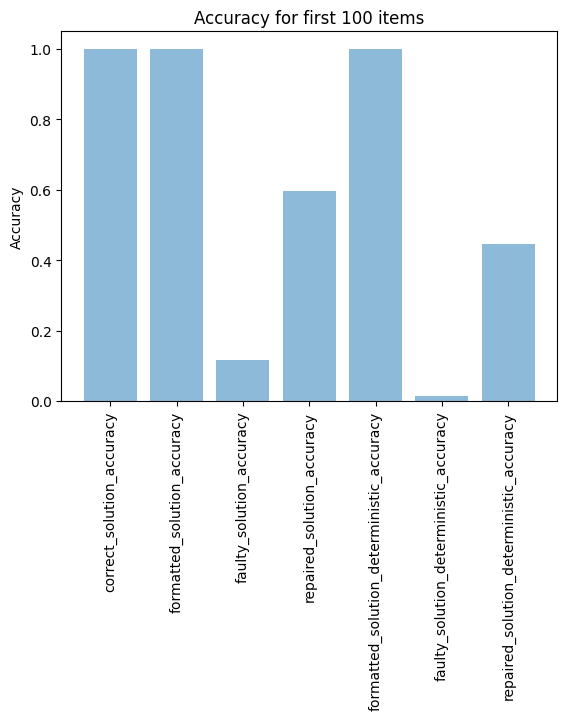

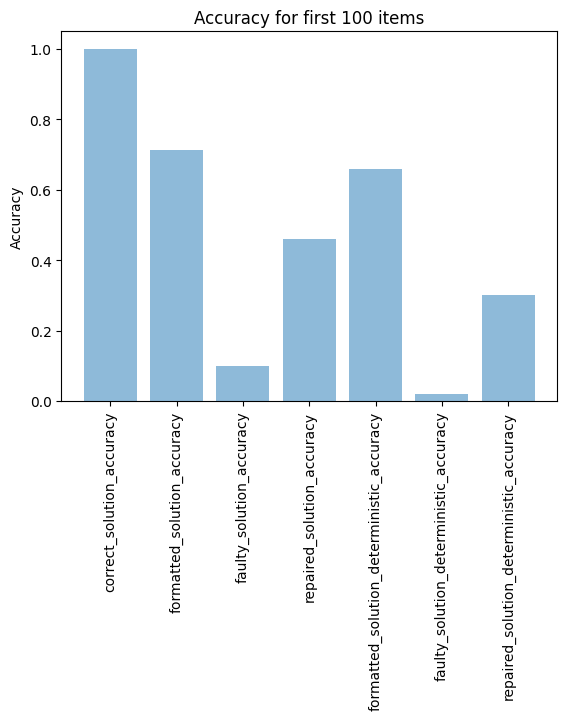

In [205]:
import matplotlib.pyplot as plt
import numpy as np

def plot_accuracies(accuracies):
    # Ensure 'accuracies' is a dictionary with lists (or arrays) of values
    feature_names = list(accuracies.keys())
    mean_accuracies = [np.mean(accuracies[feature]) for feature in accuracies]

    plt.bar(range(len(mean_accuracies)), mean_accuracies, align='center', alpha=0.5)
    plt.xticks(range(len(feature_names)), [f for f in feature_names], rotation=90)
    plt.ylabel('Accuracy')
    plt.title('Accuracy for first 100 items')
    

    plt.show()

plot_accuracies(filtered_accuracies)
plot_accuracies(accuracies)

In [206]:
print(ds[0]['formatted_solutions'])
print(ds[0]['question'])

def solution_algorithm(input_values):
    input_lines = input_values.split('\n')
    n = int(input_lines[0])
    seq = sorted(list(map(int, input_lines[1].split())))[::-1]
    a = seq[0]
    last = -1
    for i in range(len(seq)):
        if a % seq[i] == 0:
            if last != seq[i]:
                last = seq[i]
            else:
                b = seq[i]
                break
        else:
            b = seq[i]
            break
    return a, b

Recently you have received two positive integer numbers $x$ and $y$. You forgot them, but you remembered a shuffled list containing all divisors of $x$ (including $1$ and $x$) and all divisors of $y$ (including $1$ and $y$). If $d$ is a divisor of both numbers $x$ and $y$ at the same time, there are two occurrences of $d$ in the list.

For example, if $x=4$ and $y=6$ then the given list can be any permutation of the list $[1, 2, 4, 1, 2, 3, 6]$. Some of the possible lists are: $[1, 1, 2, 4, 6, 3, 2]$, $[4, 6, 1, 1, 2, 3, 2]$ or $[1, 6,

In [207]:
a = {"task_id": "HumanEval/0", "prompt": "from typing import List\n\n\ndef has_close_elements(numbers: List[float], threshold: float) -> bool:\n    \"\"\" Check if in given list of numbers, are any two numbers closer to each other than\n    given threshold.\n    >>> has_close_elements([1.0, 2.0, 3.0], 0.5)\n    False\n    >>> has_close_elements([1.0, 2.8, 3.0, 4.0, 5.0, 2.0], 0.3)\n    True\n    \"\"\"\n", "entry_point": "has_close_elements", "canonical_solution": "    for idx, elem in enumerate(numbers):\n        for idx2, elem2 in enumerate(numbers):\n            if idx != idx2:\n                distance = abs(elem - elem2)\n                if distance < threshold:\n                    return True\n\n    return False\n", "test": "\n\nMETADATA = {\n    'author': 'jt',\n    'dataset': 'test'\n}\n\n\ndef check(candidate):\n    assert candidate([1.0, 2.0, 3.9, 4.0, 5.0, 2.2], 0.3) == True\n    assert candidate([1.0, 2.0, 3.9, 4.0, 5.0, 2.2], 0.05) == False\n    assert candidate([1.0, 2.0, 5.9, 4.0, 5.0], 0.95) == True\n    assert candidate([1.0, 2.0, 5.9, 4.0, 5.0], 0.8) == False\n    assert candidate([1.0, 2.0, 3.0, 4.0, 5.0, 2.0], 0.1) == True\n    assert candidate([1.1, 2.2, 3.1, 4.1, 5.1], 1.0) == True\n    assert candidate([1.1, 2.2, 3.1, 4.1, 5.1], 0.5) == False\n\n"}

In [208]:
print(a['prompt'])
print(a.keys())

from typing import List


def has_close_elements(numbers: List[float], threshold: float) -> bool:
    """ Check if in given list of numbers, are any two numbers closer to each other than
    given threshold.
    >>> has_close_elements([1.0, 2.0, 3.0], 0.5)
    False
    >>> has_close_elements([1.0, 2.8, 3.0, 4.0, 5.0, 2.0], 0.3)
    True
    """

dict_keys(['task_id', 'prompt', 'entry_point', 'canonical_solution', 'test'])


In [209]:
print(a['canonical_solution'])

    for idx, elem in enumerate(numbers):
        for idx2, elem2 in enumerate(numbers):
            if idx != idx2:
                distance = abs(elem - elem2)
                if distance < threshold:
                    return True

    return False



In [210]:
print(a['test'])



METADATA = {
    'author': 'jt',
    'dataset': 'test'
}


def check(candidate):
    assert candidate([1.0, 2.0, 3.9, 4.0, 5.0, 2.2], 0.3) == True
    assert candidate([1.0, 2.0, 3.9, 4.0, 5.0, 2.2], 0.05) == False
    assert candidate([1.0, 2.0, 5.9, 4.0, 5.0], 0.95) == True
    assert candidate([1.0, 2.0, 5.9, 4.0, 5.0], 0.8) == False
    assert candidate([1.0, 2.0, 3.0, 4.0, 5.0, 2.0], 0.1) == True
    assert candidate([1.1, 2.2, 3.1, 4.1, 5.1], 1.0) == True
    assert candidate([1.1, 2.2, 3.1, 4.1, 5.1], 0.5) == False




In [211]:
ds.features

{'correct_solution_accuracy': Value(dtype='float64', id=None),
 'difficulty': Value(dtype='string', id=None),
 'correct_solution': Value(dtype='string', id=None),
 'solutions': Value(dtype='string', id=None),
 'url': Value(dtype='string', id=None),
 'question': Value(dtype='string', id=None),
 'starter_code': Value(dtype='string', id=None),
 'problem_id': Value(dtype='int64', id=None),
 'input_output': Value(dtype='string', id=None),
 'correct_solution_idx': Value(dtype='int64', id=None),
 'formatted_solution_accuracy': Value(dtype='float64', id=None),
 'faulty_solution_accuracy': Value(dtype='float64', id=None),
 'repaired_solution_accuracy': Value(dtype='float64', id=None),
 'formatted_solution_deterministic_accuracy': Value(dtype='int64', id=None),
 'faulty_solution_deterministic_accuracy': Value(dtype='int64', id=None),
 'repaired_solution_deterministic_accuracy': Value(dtype='int64', id=None),
 'formatted_solutions': Value(dtype='string', id=None),
 'faulty_solutions': Value(dtype